# Cálculo aplicado a eventos astronómicos

**Estudiantes**
*   Mariana González Sancho
*   Fabián Vílchez Alvarado



## Ecuaciones diferenciales para simular el movimiento orbital de la Luna alrededor de la Tierra

Las razones trigonométricas, como el seno y el coseno, son esenciales para describir las posiciones y las trayectorias de los cuerpos celestes en función del tiempo. En nuestro proyecto estamos utilizando estas funciones trigonométricas para calcular las coordenadas (x, y) de la Luna en cada instante de tiempo. El movimiento circular de la Luna alrededor de la Tierra se puede describir con precisión utilizando estas funciones, lo que permite representar el movimiento en un plano bidimensional.

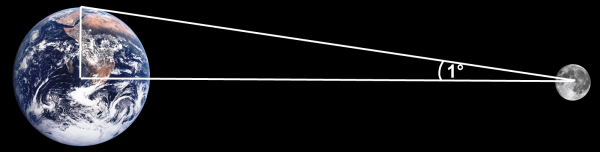

El movimiento de la Luna alrededor de la Tierra puede considerarse como un triángulo en el que un vértice es la Tierra, otro vértice es la Luna y el tercer vértice se encuentra en algún punto en la línea que conecta la Tierra y la Luna. Este punto es donde se ubica la sombra proyectada de la Luna en el plano bidimensional.

In [ ]:
%matplotlib notebook

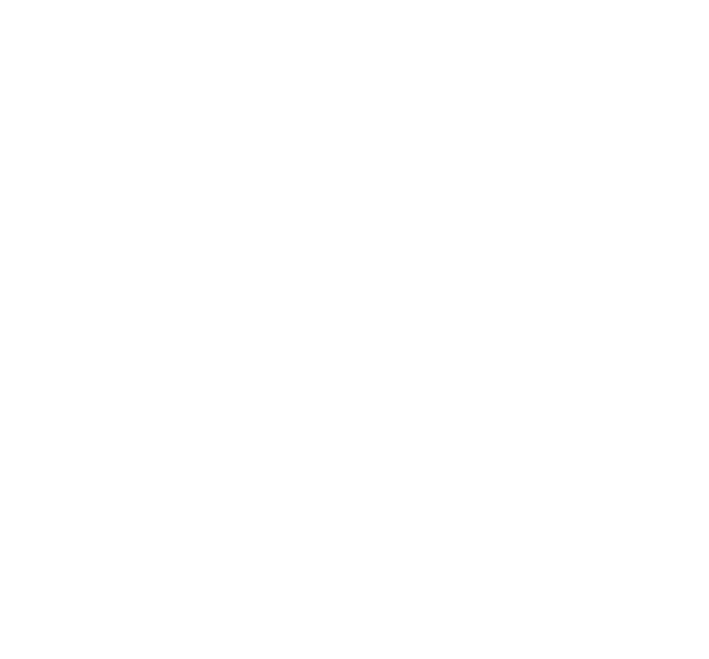

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Parámetros de la simulación
radio_tierra = 6371  # Radio de la Tierra en km
radio_luna = 1737.1  # Radio de la Luna en km
distancia_tierra_luna = 384400  # Distancia promedio Tierra-Luna en km
num_frames = 100  # Número de cuadros en la animación

# Crear una figura
fig, ax = plt.subplots(figsize=(8, 8))

# Función para inicializar la animación
def init():
    # Dibujar la Tierra
    ax.add_patch(plt.Circle((0, 0), radio_tierra, color='blue', zorder=1))

    # Dibujar la Luna
    ax.add_patch(plt.Circle((0, 0), radio_luna, color='0.5', zorder=2))

    return ax,

# Función de actualización de la animación
def update(frame):
    ax.clear()  # Borrar el gráfico actual

    # Calcular la posición de la Luna y la sombra en función del tiempo (frame)
    angulo = 2 * np.pi * frame / num_frames  # Simula el movimiento de la Luna
    x_luna = distancia_tierra_luna * np.cos(angulo)
    y_luna = distancia_tierra_luna * np.sin(angulo)

    # Dibujar la Tierra
    ax.add_patch(plt.Circle((0, 0), radio_tierra, color='blue', zorder=1))

    # Dibujar la Luna
    ax.add_patch(plt.Circle((x_luna, y_luna), radio_luna, color='0.5', zorder=2))

    # Configuración de límites y aspecto
    ax.set_xlim(-distancia_tierra_luna, distancia_tierra_luna)
    ax.set_ylim(-distancia_tierra_luna, distancia_tierra_luna)
    ax.set_aspect('equal')

    return ax,

# Crear la animación
ani = FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True)

# Mostrar la animación en la celda de Google Colab
from IPython.display import HTML
HTML(ani.to_jshtml())

## Análisis de Fourier a señales astronómicas

#####La transformada de Fourier es, sin duda, una herramienta matemática esencial en el análisis de señales. El código que se proporciona realiza la transformada de Fourier de una señal generada utilizando la función fft de la biblioteca SciPy. Esta transformada descompone la señal en sus componentes de frecuencia, lo que permite analizar las diferentes frecuencias presentes en la señal. Esto es especialmente útil en el análisis de señales astronómicas, ya que puede ayudar a detectar y analizar señales con frecuencias interesantes para la investigación en astronomía.

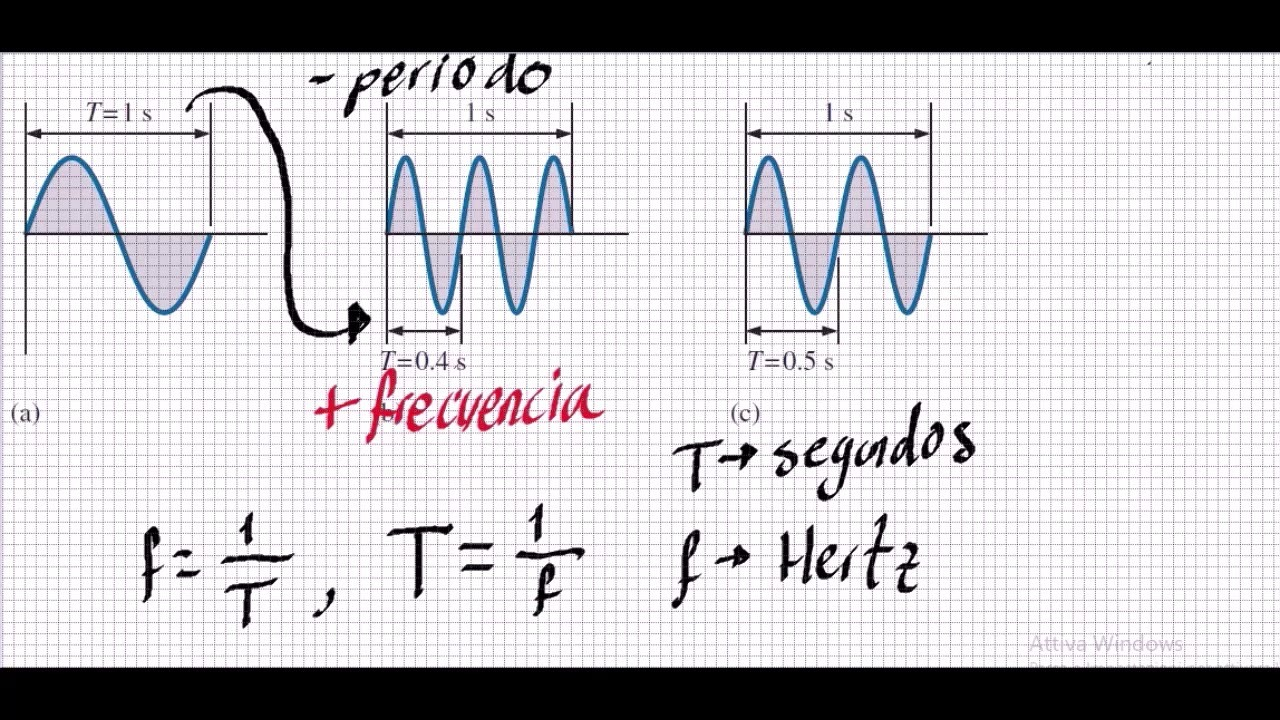

#####El código utiliza la biblioteca Matplotlib para trazar la señal generada en el dominio del tiempo y el espectro de frecuencia. Estos gráficos ayudan a visualizar cómo se ve la señal en función del tiempo y cómo se distribuyen sus componentes de frecuencia.

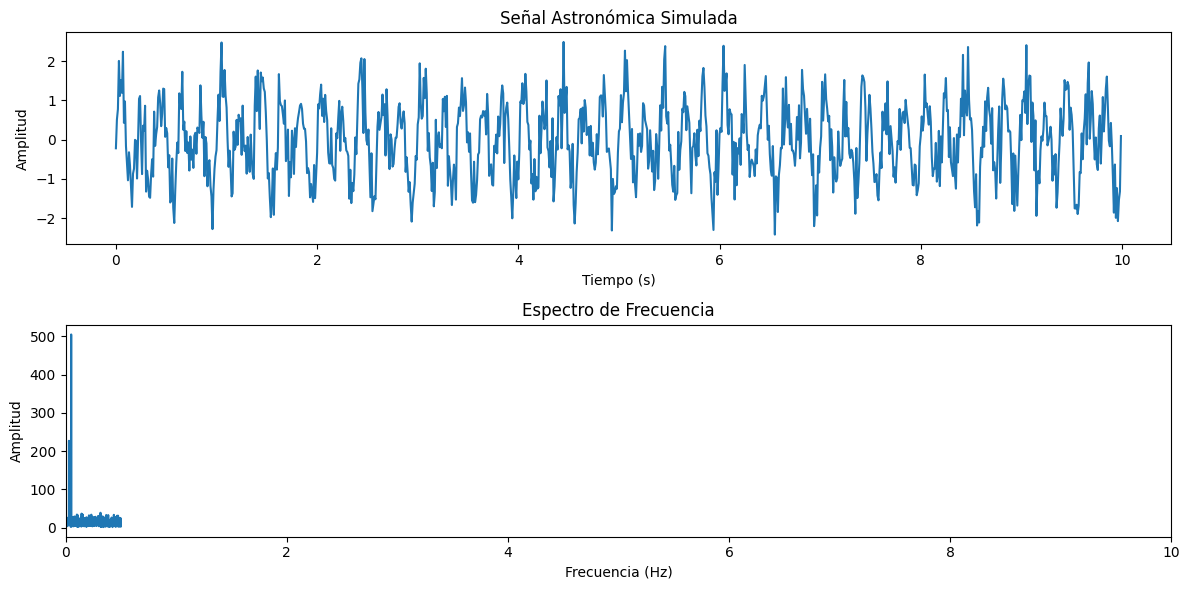

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parámetros de la señal
frecuencia_principal = 5  # Frecuencia principal en Hz
frecuencia_armónico = 3   # Frecuencia de un armónico en Hz
tiempo_total = 10         # Tiempo total de la señal en segundos
muestreo = 1000           # Número de puntos de muestreo
ruido_amplitud = 0.5      # Amplitud del ruido en la señal

# Crear un array de tiempo
tiempo = np.linspace(0, tiempo_total, muestreo, endpoint=False)

# Generar una señal con una frecuencia principal y un armónico, más ruido
señal = np.sin(2 * np.pi * frecuencia_principal * tiempo) + \
        0.5 * np.sin(2 * np.pi * frecuencia_armónico * tiempo) + \
        np.random.normal(0, ruido_amplitud, muestreo)

# Realizar la transformada de Fourier
frecuencias = fftfreq(muestreo)
transformada = fft(señal)

# Gráficos de la señal y su espectro de frecuencia
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(tiempo, señal)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Astronómica Simulada')

plt.subplot(2, 1, 2)
plt.plot(frecuencias, np.abs(transformada))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de Frecuencia')
plt.xlim(0, 10)  # Limitar el rango para una mejor visualización
plt.tight_layout()
plt.show()